# Analytics Case Study
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
#Importing Libraries

<a id='intro'></a>
## Introduction

The Chief Operating Officer of a wireless phone company, TelCo Inc., has noticed that the company’s customer satisfaction scores have been dropping. Additionally, the call volume in their customer service center has been increasing, which is driving increased operating costs.
They Gave us this data to try to understand the reasons behind this and a recommendations to handle it.

<a id='wrangling'></a>
# Data Wrangling

In [2]:
#Reading data from excel file
cst_sts_res=pd.read_excel('Dataset - Data Analyst Vacancy.xlsx',sheet_name='Customer Satisfaction Results')
cst_sts_res.head()

,Account Number,Interaction ID,Call Date,Agent ID,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable
0,9000001,1234501,2010-04-15,1,3,2,1,3,1
1,9000031,1234506,2010-04-15,1,4,3,3,4,4
2,9000060,1234521,2010-04-16,1,2,4,3,5,4
3,9000024,1234525,2010-04-17,1,3,4,4,3,4
4,9000025,1234542,2010-04-19,1,5,5,4,5,5


In [3]:
act_inter=pd.read_excel('Dataset - Data Analyst Vacancy.xlsx',sheet_name='Account Interactions')
act_inter.head()

,Account Number,Interaction ID,Call Date,Call Reason,Call Resolution,Agent ID
0,9000001,1234501,2010-04-15,Add Services,Transfer (Other Dept),1
1,9000010,1234502,2010-04-15,Make Payment,Explain Bill (no changes made),9
2,9000010,1234503,2010-04-15,Make Payment,Phone Disconnect,10
3,9000019,1234504,2010-04-15,Make Payment,Process Payment,2
4,9000029,1234505,2010-04-15,Add Services,Add Minutes,9


In [4]:
Ag_Info=pd.read_excel('Dataset - Data Analyst Vacancy.xlsx',sheet_name='Agent Information')
Ag_Info.head()

,Agent ID,Agent Name,Agent Role,Agent Tenure
0,1,"Smith, John",Tier 1,0-30
1,2,"Jones, Amanda",Tier 2,60-90
2,3,"Davis, Kelly",Tier 2,120+
3,4,"Miller, Ross",Tier 1,0-30
4,5,"Johnson, Emily",Tier 1,0-30


In [5]:
# Fast view on Data Info.
cst_sts_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 9 columns):
Account Number                  126 non-null int64
Interaction ID                  126 non-null int64
Call Date                       126 non-null datetime64[ns]
Agent ID                        126 non-null int64
1. Overall Experience?          126 non-null int64
2a. Agent Quality of Service    126 non-null int64
2b. Resolve Issue               126 non-null int64
2c. Courteous                   126 non-null int64
2d. Knowledgeable               126 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 9.0 KB


In [6]:
Ag_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Agent ID        10 non-null int64
Agent Name      10 non-null object
Agent Role      10 non-null object
Agent Tenure    10 non-null object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [7]:
act_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
Account Number     126 non-null int64
Interaction ID     126 non-null int64
Call Date          126 non-null datetime64[ns]
Call Reason        126 non-null object
Call Resolution    126 non-null object
Agent ID           126 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 6.0+ KB


In [8]:
#Cheking null Values....
act_inter.isnull().sum(),Ag_Info.isnull().sum(),cst_sts_res.isnull().sum()

(Account Number     0
 Interaction ID     0
 Call Date          0
 Call Reason        0
 Call Resolution    0
 Agent ID           0
 dtype: int64, Agent ID        0
 Agent Name      0
 Agent Role      0
 Agent Tenure    0
 dtype: int64, Account Number                  0
 Interaction ID                  0
 Call Date                       0
 Agent ID                        0
 1. Overall Experience?          0
 2a. Agent Quality of Service    0
 2b. Resolve Issue               0
 2c. Courteous                   0
 2d. Knowledgeable               0
 dtype: int64)

In [9]:
#No null values, Cheking Dupliated....
act_inter.duplicated().sum(),Ag_Info.duplicated().sum(),cst_sts_res.duplicated().sum()

(0, 0, 0)

In [10]:
#No Duplicates, data is Clean


### I noticed 2 sheets have common Interaction IDs, Let's join the data for better handling.

In [11]:
#Inner join on Interaction ID
full_data=pd.merge(cst_sts_res,act_inter,on='Interaction ID')

In [12]:
full_data.head(8)

,Account Number_x,Interaction ID,Call Date_x,Agent ID_x,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable,Account Number_y,Call Date_y,Call Reason,Call Resolution,Agent ID_y
0,9000001,1234501,2010-04-15,1,3,2,1,3,1,9000001,2010-04-15,Add Services,Transfer (Other Dept),1
1,9000031,1234506,2010-04-15,1,4,3,3,4,4,9000031,2010-04-15,Billing Dispute,Credit Account,1
2,9000060,1234521,2010-04-16,1,2,4,3,5,4,9000060,2010-04-16,Make Payment,Phone Disconnect,1
3,9000024,1234525,2010-04-17,1,3,4,4,3,4,9000024,2010-04-17,Billing Question,Explain Bill (no changes made),1
4,9000025,1234542,2010-04-19,1,5,5,4,5,5,9000025,2010-04-19,Make Payment,Process Payment,1
5,9000057,1234545,2010-04-19,1,2,3,2,4,1,9000057,2010-04-19,Add Services,Transfer (Other Dept),1
6,9000006,1234559,2010-04-21,1,5,5,5,5,5,9000006,2010-04-21,Cancel Service,Explain Bill (no changes made),1
7,9000019,1234569,2010-04-22,1,5,5,4,5,5,9000019,2010-04-22,Cancel Service,Credit Account,1


In [13]:
#some columns ae duplicated, Let's remove them
full_data.drop(columns=['Account Number_y','Call Date_y','Agent ID_y'],inplace =True)

In [14]:
#View Data afte droping
full_data.head(8)

,Account Number_x,Interaction ID,Call Date_x,Agent ID_x,1. Overall Experience?,2a. Agent Quality of Service,2b. Resolve Issue,2c. Courteous,2d. Knowledgeable,Call Reason,Call Resolution
0,9000001,1234501,2010-04-15,1,3,2,1,3,1,Add Services,Transfer (Other Dept)
1,9000031,1234506,2010-04-15,1,4,3,3,4,4,Billing Dispute,Credit Account
2,9000060,1234521,2010-04-16,1,2,4,3,5,4,Make Payment,Phone Disconnect
3,9000024,1234525,2010-04-17,1,3,4,4,3,4,Billing Question,Explain Bill (no changes made)
4,9000025,1234542,2010-04-19,1,5,5,4,5,5,Make Payment,Process Payment
5,9000057,1234545,2010-04-19,1,2,3,2,4,1,Add Services,Transfer (Other Dept)
6,9000006,1234559,2010-04-21,1,5,5,5,5,5,Cancel Service,Explain Bill (no changes made)
7,9000019,1234569,2010-04-22,1,5,5,4,5,5,Cancel Service,Credit Account


In [15]:
full_data['Call Date_x']=full_data['Call Date_x'].astype(str)

In [16]:
#full_data.to_excel("New_Dataset - Data Analyst Vacancy.xlsx")

In [17]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 11 columns):
Account Number_x                126 non-null int64
Interaction ID                  126 non-null int64
Call Date_x                     126 non-null object
Agent ID_x                      126 non-null int64
1. Overall Experience?          126 non-null int64
2a. Agent Quality of Service    126 non-null int64
2b. Resolve Issue               126 non-null int64
2c. Courteous                   126 non-null int64
2d. Knowledgeable               126 non-null int64
Call Reason                     126 non-null object
Call Resolution                 126 non-null object
dtypes: int64(8), object(3)
memory usage: 11.8+ KB


In [18]:
print('Data Rows = ',full_data.shape[0] ,'\nData Columns = ',full_data.shape[1])

Data Rows =  126 
Data Columns =  11


<a id='eda'></a>
## Exploratory Data Analysis

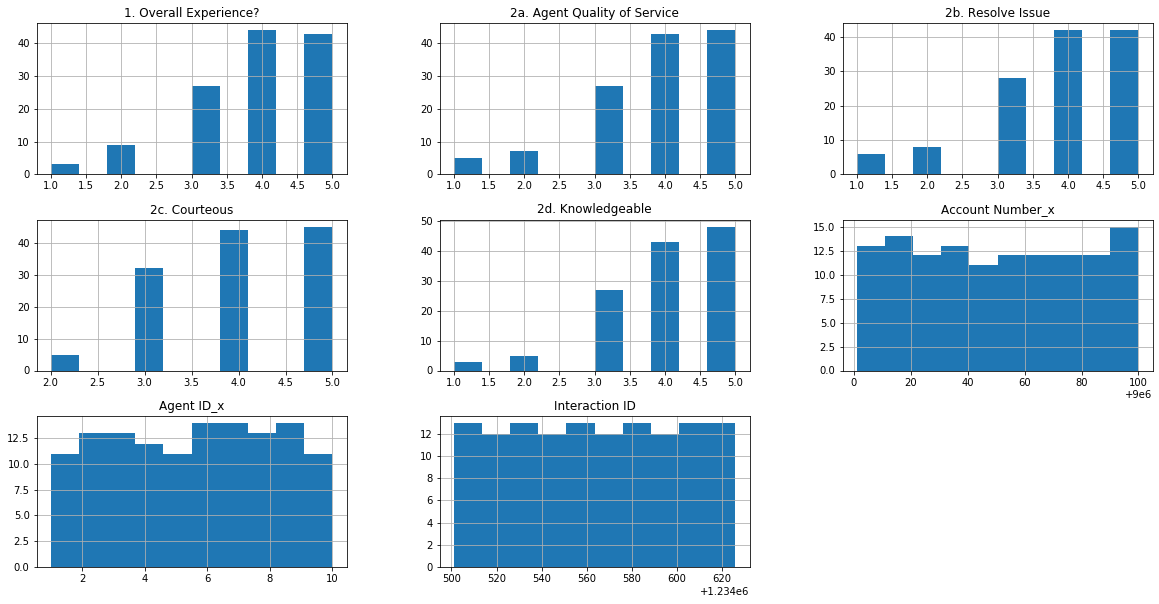

In [19]:

full_data.hist(figsize=(20,10));


### We can Notice that Most Oerall Expeience is rated more than 2 (Fair), Same on other rated features on scale from 1 to 5, We need to define most important attr. that affets the Overall Experience.

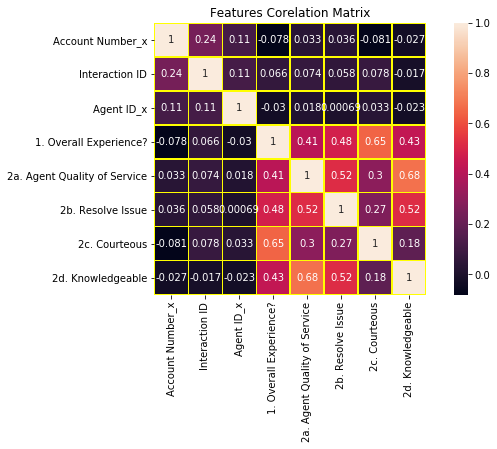

In [20]:
#Examining Correlation between features
plt.figure(figsize=(10,5))
ax=sb.heatmap(full_data.corr(),annot=True,linewidths=0.5,annot_kws={"size": 10},linecolor="yellow",square=True,);
bottom , top = ax.get_ylim()
ax.set_ylim(bottom +0.5,top -0.5)
plt.title("Features Corelation Matrix");

### The correlation Matrix tells us that Overall Experience is has a moderted correlation with (Agent Quality of servie, Resolve Issue and Knowledge), Also a strong Correlation with (Courteous)

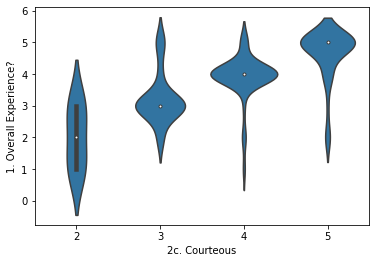

In [21]:
#Let's Examine Courteous effect on Overall exp. by plotting
base_c=sb.color_palette()[0]
sb.violinplot(x=full_data['2c. Courteous'],y=full_data['1. Overall Experience?'],color=base_c);

### As we see the more Courteous from the agent the more possibility the customer would be satisfied, Infact seeing the density tells as it has a great effect on making the customer enjoys the call, the less rated as 2 is very diversed and that decrease the chances of insuring the customer would be satisfied.

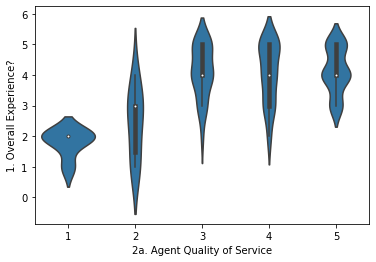

In [22]:
#Let's Examine Agent Quality of Service effect on Overall exp. by plotting
sb.violinplot(x=full_data['2a. Agent Quality of Service'],y=full_data['1. Overall Experience?'],color=base_c);

### As we see also the more Quality of Service from the agent the more possibility the customer would be satisfied, Most of high rated Overall exp. had a high quality service, Rated 1 and 2 hae a relatively low quality of service.

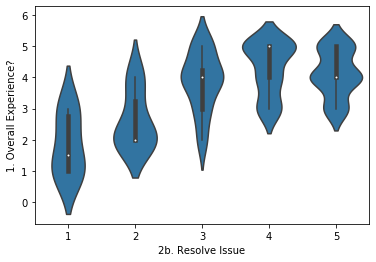

In [23]:
#Let's Examine Agent Quality of Resolving Issue effect on Overall exp. by plotting
sb.violinplot(x=full_data['2b. Resolve Issue'],y=full_data['1. Overall Experience?'],color=base_c);

### Again we see also the more Resolve Issue quality from the agent the more possibility the customer would be satisfied, Most of high rated Overall exp. had a Resolve Issue ratings , Rated 1 and 2 hae a relatively low quality of Resolving Issue.

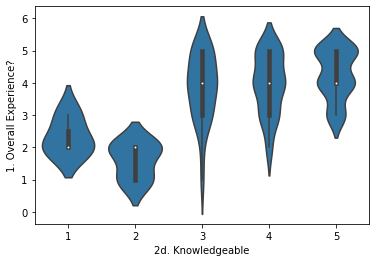

In [24]:
#Let's Examine Agent Knowledge effect on Overall exp. by plotting
sb.violinplot(x=full_data['2d. Knowledgeable'],y=full_data['1. Overall Experience?'],color=base_c);

### As we see also the more Knowledge from the agent the more possibility the customer would be satisfied, Most of high rated Overall exp. had a high quality service, Rated 1 and 2 hae a relatively low quality of service.

### We notice from this plots that ratings from 3-5 nearly all of them requires an average of 4 or higher rating in the other 4 features, Agents being rated 4 or above in other features will surely gain a pleasable customer satisfiction.

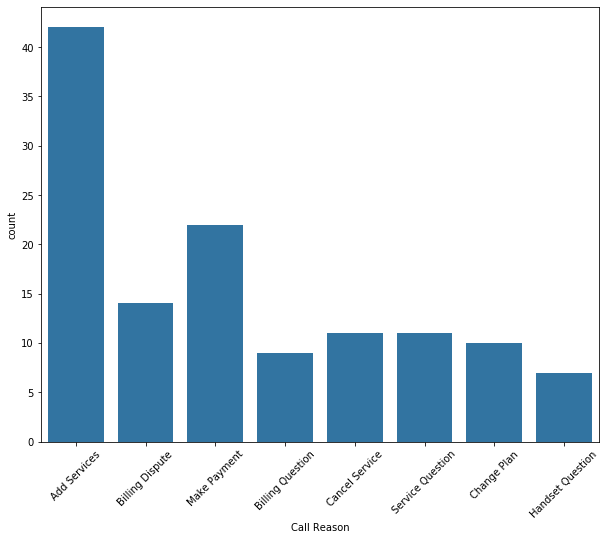

In [25]:
#Call reasons Dist.
plt.figure(figsize=(10,8))
sb.countplot(x=full_data['Call Reason'],color=base_c)
plt.xticks(rotation=45)
plt.show()


### Most calls are about adding services, followed by makeing payment then the remaining features..

### Which calls could lead the customer's to rate poor exp.

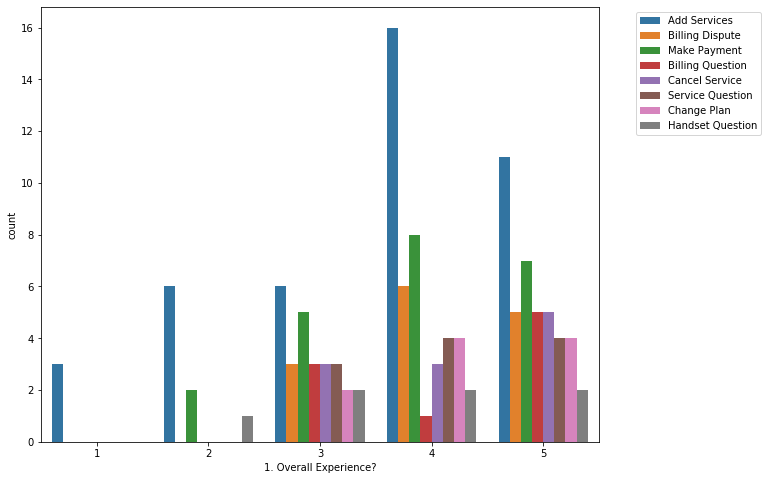

In [26]:
#Plotting overall exp. with call reasons...
plt.figure(figsize=(10,8))
sb.countplot(x=full_data['1. Overall Experience?'],hue=full_data['Call Reason'])
plt.legend(loc='upper right', bbox_to_anchor=(1+.3,1))
plt.show()


### As we can see all poor(1) Overall exp. calls were about add servie, Rated fair(2) are mostly also about add service and with smaller values (Make payment and Handset Questions)

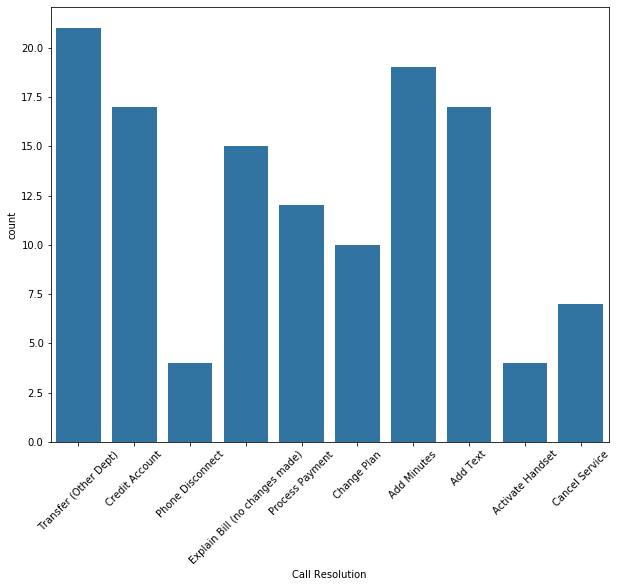

In [27]:
plt.figure(figsize=(10,8))
sb.countplot(x=full_data['Call Resolution'],color=base_c)
plt.xticks(rotation=45)
plt.show()

### Most calls are about Transfers, followed by adding Minutes or tests or bout credit account then the remaining features..

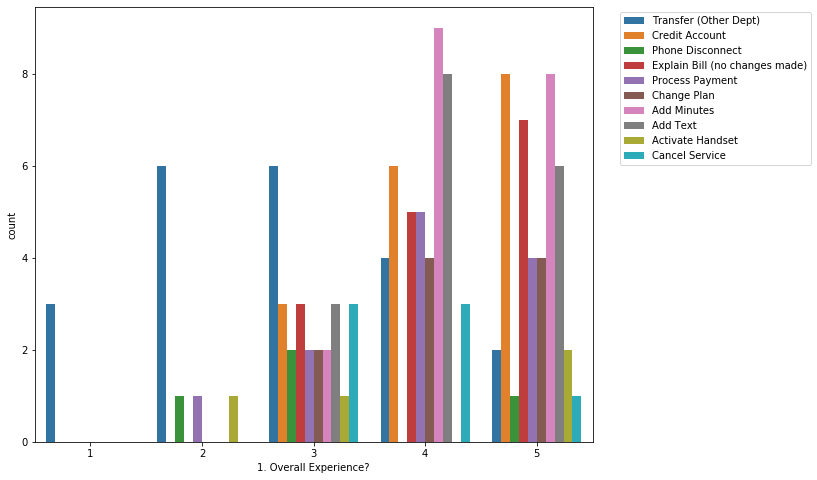

In [28]:
plt.figure(figsize=(10,8))
sb.countplot(x=full_data['1. Overall Experience?'],hue=full_data['Call Resolution'])
plt.legend(loc='upper right', bbox_to_anchor=(1+.4,1))
plt.show()

### As we can see all poor(1) Overall exp. calls ended by Transfer, Rated fair(2) are mostly also about add service and with smaller values (Phone disonnect, Add Text and Activate Handset)

### What's Overall exp. by agents ?  Does this relation has an effect ?

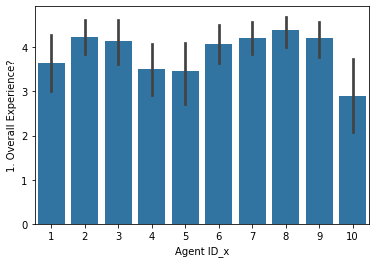

In [29]:
#Plotting Overall exp. by agent...
sb.barplot(x=full_data['Agent ID_x'],y=full_data['1. Overall Experience?'],color=base_c);

### We can see here some agents rating mean is quit low especially agent 10, Agents 1,4 and 5 also need improvement to atleast have an average of rating = 4 to ensure customer satisfiction.

### Now let's ask, Does agent's tenure has an effect his performane to gain more customer satis. ?

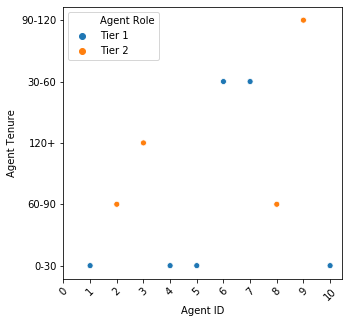

In [30]:
#Plotting Agents ID with Agent Tenure with respect to His role...
plt.figure(figsize=(5,5))
x_bins=np.arange(0, 11, step=1)
sb.scatterplot(y=Ag_Info['Agent Tenure'],x=Ag_Info['Agent ID'],hue=Ag_Info['Agent Role'],color=base_c)
plt.xticks(x_bins,rotation=45)
plt.show()

### It's more obvious now, Those agents are hired recently and lacked of experience, Still we need to focus on defining what they need to improve.

In [31]:
#Function to get agent feature mean along his calls ....
def means(x):
    Agnt_means=[]
    for i in range(1,11):
        agnt_data=full_data[full_data['Agent ID_x']==i][x]
        Agnt_means.append(agnt_data.mean())
    print(x,'agents means: \n')
    for y in range(0,10):
         print(Agnt_means[y],'\t')
    plt.grid(True)        
    sb.lineplot(x=range(1,11),y=Agnt_means)
    plt.xticks(x_bins,rotation=45)

### Now we will have a look on every agent average across other 4 features to determine what they need to improve...

2c. Courteous agents means: 

4.0 	
4.153846153846154 	
4.076923076923077 	
3.75 	
3.727272727272727 	
4.0 	
4.071428571428571 	
4.230769230769231 	
4.285714285714286 	
3.8181818181818183 	


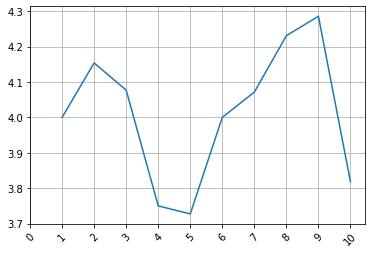

In [32]:
# we start with Corteous
x=means('2c. Courteous')

### We can see here agents 4,5 and then 10 need to act in a more Courteous way with customers, And this is very critical for the customer experience as we discussed earlier.

2d. Knowledgeable agents means: 

3.4545454545454546 	
4.461538461538462 	
4.3076923076923075 	
3.75 	
3.8181818181818183 	
4.357142857142857 	
3.9285714285714284 	
4.3076923076923075 	
3.857142857142857 	
3.727272727272727 	


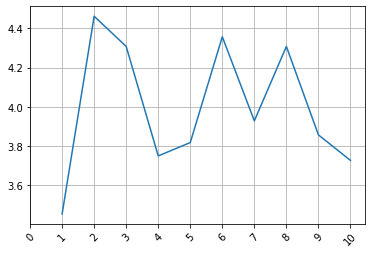

In [33]:
#Now Knowledge
means('2d. Knowledgeable')

### Now we see agent 1 problem, Even his Corteous average is 4 (very good) He needs to work harder on his knowledge as he has the lowest average,  Agent 4,5 and 10 also need improvement.

2b. Resolve Issue agents means: 

3.3636363636363638 	
3.923076923076923 	
4.384615384615385 	
3.5 	
3.6363636363636362 	
3.9285714285714284 	
4.0 	
4.153846153846154 	
4.214285714285714 	
3.0 	


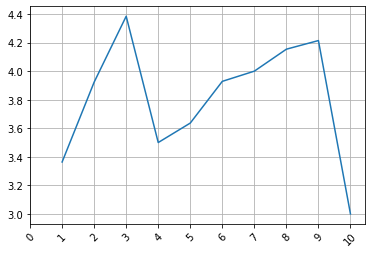

In [34]:
#Let's see resloving the issues
means('2b. Resolve Issue')

### Agent 10 here needs to revise his training along side agent 1, Also agents 4,5 needs impvroement they my gain with experience.

2a. Agent Quality of Service agents means: 

3.8181818181818183 	
4.230769230769231 	
4.0 	
3.25 	
3.6363636363636362 	
4.142857142857143 	
3.857142857142857 	
4.153846153846154 	
4.142857142857143 	
3.6363636363636362 	


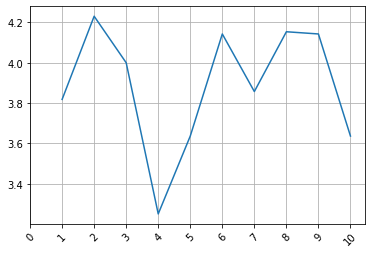

In [35]:
#Let's see Agent Quality of Service
means('2a. Agent Quality of Service')

### Agent 4 here needs to improve his servie quality, Also agents 1,5,7 and 10 need to work on it.

1. Overall Experience? agents means: 

3.6363636363636362 	
4.230769230769231 	
4.153846153846154 	
3.5 	
3.4545454545454546 	
4.071428571428571 	
4.214285714285714 	
4.384615384615385 	
4.214285714285714 	
2.909090909090909 	


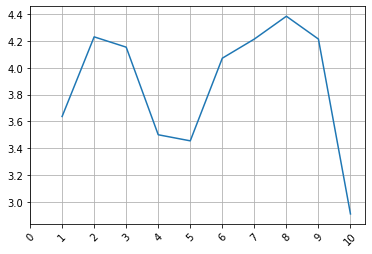

In [36]:
#Now a look on each agent aevrage Customer's overall exp.....
means('1. Overall Experience?')

### Agent 10 really needs to work on himself, Agents 4 nd 5 still also need to improve, Agent 1 is the closest to improve maybe he only needs time.

<a id='conclusions'></a>
## Conclusions


### Answers to requested questions :
#### 1-What are some potential drivers of the decreased customer satisfaction and increased call volume?
#### According to my findings :
#### (A) Lacking in agent's (Knoweldge, Service quality, Issue resolving leads to less customer satisfaction and increased call volume.
#### (B) Courteous is the most important feature here in affecting customer's satisfaction, It has a strong relation with customer's overall experience.
#### (C) Nearly all Poor and Fair ratings related to customers who request Adding servies and the agent fails to satisfy them.
#### (D) Nearly all poor and fair ratings related to transfering the call to other dep. or call disconecting.


#### 2- What data supports these findings and how did you come to these conclusions?
#### That's the Exploratory Data Analysis and covered here :
<li><a href="#eda">Exploratory Data Analysis</a></li>

#### 3-What are some potential recommendations to improve these issues?
#### (A) Demanding agents with average less than 4 in Knowledge feature to revise and enhance their knowledge. 
#### (B) Emphasize the importance of Courteous with customers.
#### (C) Agents with service quality or issue resolving  average less than 4 need to improve to achieve high customer satisfaction.
#### (D) If it's possible to reduce amount of calls about 'Adding service' to recently hired agents would be a good approach.
#### (E) The company should consider revising  the call transfering protocols or increase observing transfering calls reasons. 

#### What are the benefits of implementing your recommendations?
#### (A) Mainly lacking in knowledge would inreases the call volume and cause less customer's satisfaction, So improvement from agents is needed.
#### (B)Courteous is greatly affecting customers overall experience, Emphasize the importance of is important and causes customer's satisfaction to increase.
#### (C)The more service quality and problem solving from the agent the more the customer gets satisfied and the less call duration.
#### (D)Reducing amount of calls about 'Adding service' to recently hired agents to let them gain experience with less harm to Customer's satisfaction as all poor rated calls are about 'Adding Service'
#### (E)Transfering calls to other department upsets many customers for a reason, The company should revise the transfering protocols to avoid wasting the customer's time without any need or misunderstanding from the agent which also increases the call duration and would make the customer consider this as a bad experience.

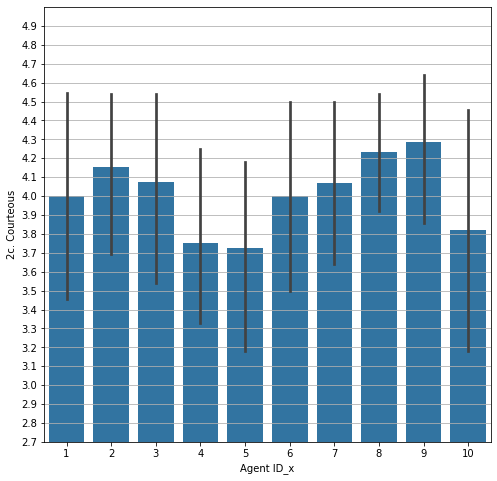

In [49]:
plt.figure(figsize=(8,8))
plt.yticks(np.arange(2.7,5,0.1))
plt.ylim(2.7,5)
plt.grid(True)
sb.barplot(x=full_data['Agent ID_x'],y=full_data['2c. Courteous'],color=base_c);
